In [ ]:
from hmmlearn.hmm import GaussianHMM
from hmmlearn import hmm
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Марковские модели

Марковская модель - важное свойство многих моделей случайных процессов. 

В Марковской модели порядка $𝑚$ совместное распределение 
$$𝑝(𝑦_{1:𝑇})=𝑝(𝑦_1,...,𝑦_𝑇)$$ 
случайного процесса с дискретным временем $𝑦_𝑡$, 𝑡=1,2... факторизуется
$$𝑝(𝑦𝑡1:𝑇)=\prod_{𝑡=1}^𝑇 𝑝(𝑦_𝑡|𝑦_{𝑡−𝑚:𝑡−1})$$
которое отражает тот факт, что только последние 𝑚 наблюдений 𝑡_{𝑡−𝑚}:{𝑡−1}непосредственно влияют на 𝑦_𝑡 а переходные вероятности 𝑝(𝑦𝑡|𝑦{𝑡−𝑚}:{𝑡−1}) независимы.

### Стационарное распределение цепи Маркова

Пусть $𝑦_𝑡$ — однородная цепь Маркова с дискретным временем, счётным пространством состояний 1,2,…, и матрицей переходных вероятностей Θ=(𝜃𝑖𝑗),𝑖,𝑗=1,2,…. 

Тогда дискретное распределение 𝑞=(𝑞1,𝑞2,…) называется стациона́рным (инвариа́нтным), если
$$ 𝑞Θ=𝑞$$

### Классификация состояний цепи Маркова

Состояние 𝑠𝑗 дискретной цепи Маркова называется **поглощающим**, если его невозможно покинуть, что означает 𝜃𝑗,𝑗=1. 

**Поглощающая цепь Маркова** - это цепь, которая содержит, по крайней мере, одно поглощающее состояние, которое может быть достигнуто, не обязательно в один шаг. 

Непоглощающие состояния поглощающей цепи Маркова определяются как **переходные состояния**. 

Кроме того, состояния, которые процесс может посещать более одного раза, называются **рекуррентными состояниями**.

Цепь Маркова называется **неприводимой**, если любое состояние 𝑠𝑗 может быть достигнуто из любого другого состояния 𝑠𝑖 за конечное число переходов. 

В этом случае все состояния цепи называются **сообщающимися**

Дискретный Марковский процесс называется **эргодическим**, если существует число 𝑁, что можно достичь любого состояния не более чем за 𝑁 шагов.

**Фундаментальной матрицей** цепи Маркова называется матрица $N=\sum_{i=0}^{\infty}Q_i$, где Q — матрица переходов между непоглощающими состояниями, в которой отсутствуют строки с поглащающими состояними

In [ ]:
from discreteMarkovChain import markovChain
p = np.array([[0.2, 0.6, 0.1, 0.1], [0.0, 0.6, 0.3, 0.1], [0.0, 0.0, 1, 0.0], [0.5, 0.0, 0.5, 0.0]])
mc = markovChain(p)
mc.computePi()
print(mc.pi)

In [ ]:
from pydtmc import MarkovChain
p = [[0.2, 0.7, 0.0, 0.1], [0.0, 0.6, 0.3, 0.1], [0.0, 0, 1, 0.0], [0.5, 0.0, 0.5, 0.0]]
mc = MarkovChain(p, ['A', 'B', 'C', 'D'])
print(mc)

In [ ]:
print(mc.is_ergodic)
print('-'*50)
print(mc.recurrent_states)
print('-'*50)
print(mc.transient_states)
print('-'*50)
print(mc.steady_states)
print('-'*50)
print(mc.is_absorbing)
print('-'*50)
print(mc.fundamental_matrix)
print('-'*50)
print(mc.entropy_rate)

In [ ]:
print(mc.absorption_probabilities())

print('-'*50)

print(mc.expected_rewards(10, [2, -3, 8, -7]))

print('-'*50)

print(mc.expected_transitions(2))

print('-'*50)

print(mc.first_passage_probabilities(5, 3))

print('-'*50)
 
print(mc.hitting_probabilities([0, 1]))

print('-'*50)

print(mc.mean_absorption_times())

print('-'*50)

print(mc.mean_number_visits())

print('-'*50)

print(mc.simulate(10, seed=32))

### Cкрытая марковская модель (HММ)

Скрытая марковская модель (СММ) Hidden Markov Model (HMM) — статистическая модель, имитирующая работу процесса, похожего на марковский процесс с неизвестными параметрами, и задачей ставится разгадывание неизвестных параметров на основе наблюдаемых. Полученные параметры могут быть использованы в дальнейшем анализе, например, для распознавания образов.

В обычной марковской модели состояние видимо наблюдателю, поэтому вероятности переходов — единственный параметр. В скрытой марковской модели мы можем следить лишь за переменными, на которые оказывает влияние данное состояние. Каждое состояние имеет вероятностное распределение среди всех возможных выходных значений. Поэтому последовательность символов, сгенерированная СММ, даёт информацию о последовательности состояний.

Значение скрытой переменной $𝑥_𝑡$ (в момент времени 𝑡) зависит только от значения скрытой переменной $𝑥_{𝑡−1}$. Это называется свойством Маркова. Хотя в то же время значение наблюдаемой переменной $𝑦_𝑡$ зависит только от значения скрытой переменной $𝑥_𝑡$ (обе в момент времени 𝑡).

Классическим примером анализа скрытых марковских моделей является анализ функционирования рынка. Например, ежедневные данные о доходах на рынках акций часто имеют период спокойной более низкой волатильности, даже в течение ряда лет, с другой стороны встречаются периоды высокой волатильности в моменты «паники» или «коррекции».

In [ ]:
# hidden states
z_decode = {0:'sunny',1:'rainy',2:'foggy'}
z_encode = {'sunny':0,'rainy':1,'foggy':2}

# possible observations
# 'yes' for unbrella is observed
x_decode = {0:'yes',1:'no'}
x_encode = {'yes':0,'no':1}

# start probability vector for hidden states is given in the instruction
# P(sunny) = 0.5, P(rainy) = 0.25, P(foggy) = 0.25
start_prob = [0.5, 0.25, 0.25]

In [43]:
df = pd.read_csv('weather.csv', sep =';')
df
def my_rename(x):
    if x == 'sunny':
        return 0
    if x == 'rainy':
        return 1
    return 2
state_seq = df['weather'].apply(my_rename)
observation_seq = df['umbrella'].apply(lambda x: int(x=='no'))

<Axes: xlabel='weather'>

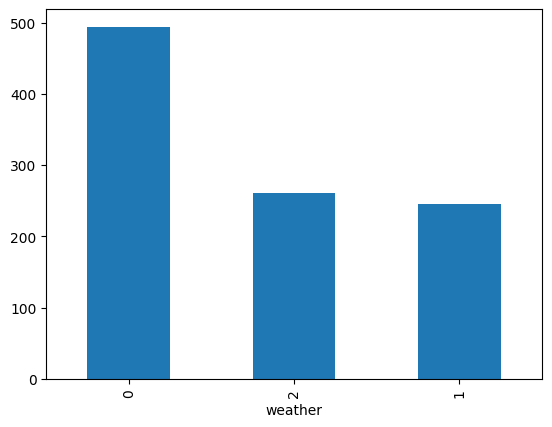

In [44]:
pd.Series(state_seq).value_counts().plot(kind='bar')

<Axes: xlabel='umbrella'>

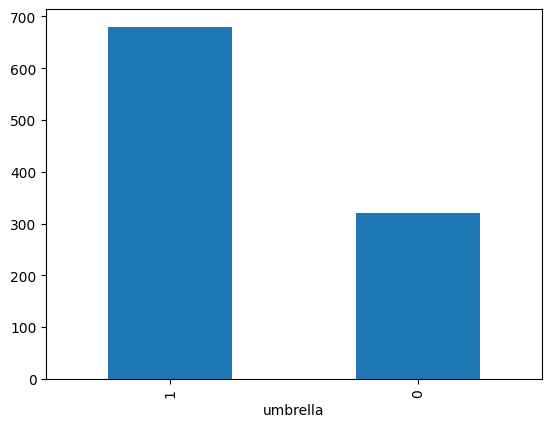

In [45]:
pd.Series(observation_seq).value_counts().plot(kind='bar')

In [46]:
df = pd.DataFrame({'hidden':state_seq,'observation':observation_seq})
df.groupby(['hidden','observation'])['observation'].count()

hidden  observation
0       0               42
        1              452
1       0              199
        1               46
2       0               79
        1              182
Name: observation, dtype: int64

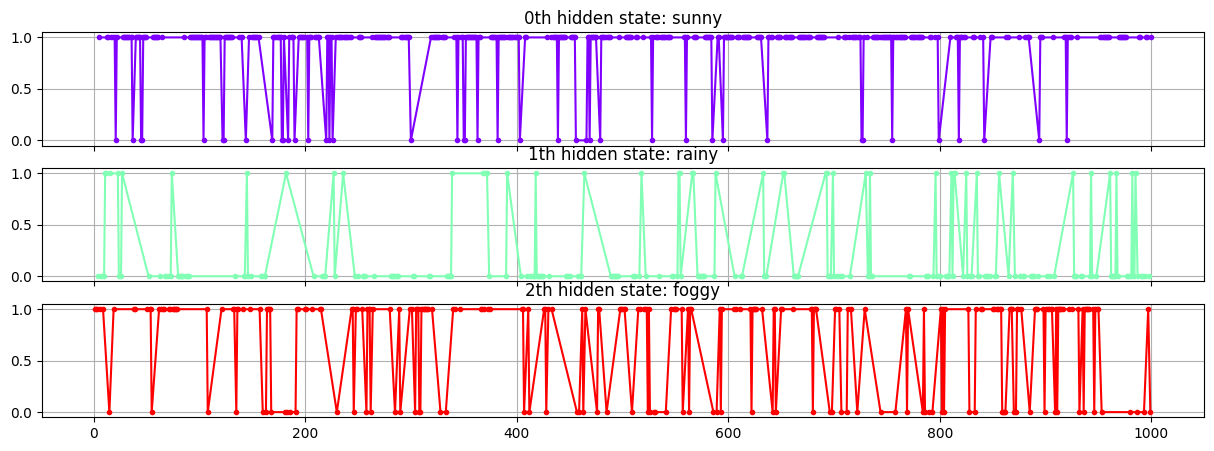

In [48]:
from matplotlib import cm
num_hidden_states = 3
fig, axs = plt.subplots(num_hidden_states, sharex=True, sharey=True,figsize=(15,5))
colours = cm.rainbow(np.linspace(0, 1, num_hidden_states))
date_range = np.array(range(1,len(state_seq)+1))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = np.array(state_seq) == i
    ax.plot(date_range[mask], np.array(observation_seq)[mask], ".-", c=colour)
    ax.set_title("{0}th hidden state".format(i)+': '+z_decode[i])

    ax.grid(True)

plt.show()

Text(0, 0.5, 'Weather')

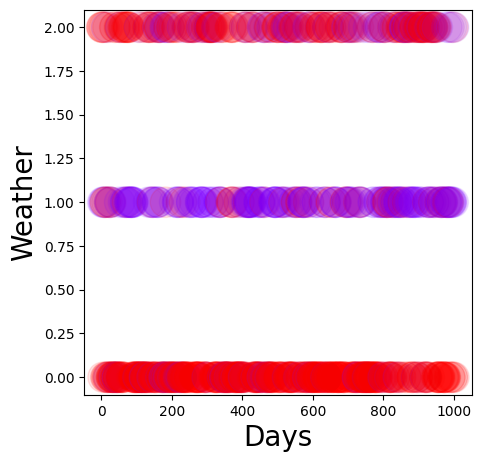

In [49]:
fig = plt.figure(figsize=(5,5)) 
fig1 = fig.add_subplot(111)
fig1.scatter(range(1,len(state_seq)+1), state_seq, s=480, c=observation_seq, alpha=0.1, cmap=plt.cm.rainbow)
fig1.set_xlabel('Days', fontsize=20)
fig1.set_ylabel('Weather', fontsize=20)

Sunny:0, rainy:1, foggy:2;
With umbrella: blue, without umbrella: red

For sunny, we see most of the times there are no umbrella

For rainy, we see the majority of the time ther are umbrellas

For foggy, there are more days we see no umbrella than days we see there are.

In [50]:
model_fitted = hmm.MultinomialHMM(n_components=3, n_iter=1000)

observation_seq = np.array(observation_seq).reshape(-1, 1)
model_fitted.fit(observation_seq)

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


MultinomialHMM(n_components=3, n_iter=1000,
               n_trials=array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,...
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1]),
               random_state=RandomState(MT19937) at 0x109FBF740)

In [51]:
# E.G. {sunny: {sunny: 11, rainy: 20, foggy: 5}}
state_occurrence_dic = {}
for i in range(1,len(state_seq)):
    if state_seq[i-1] not in state_occurrence_dic:
        state_occurrence_dic[state_seq[i-1]] = {state_seq[i]:1}
    else:
        if state_seq[i] not in state_occurrence_dic[state_seq[i-1]]:
            state_occurrence_dic[state_seq[i-1]][state_seq[i]] = 1
        else:
            state_occurrence_dic[state_seq[i-1]][state_seq[i]] += 1
sunny = np.array(list(state_occurrence_dic[0].values()))/float(sum(list(state_occurrence_dic[0].values())))
rainy = np.array(list(state_occurrence_dic[1].values()))/float(sum(list(state_occurrence_dic[1].values())))
foggy = np.array(list(state_occurrence_dic[2].values()))/float(sum(list(state_occurrence_dic[2].values())))
transition_matrix = np.vstack((sunny,rainy,foggy))
transition_matrix

array([[0.15010142, 0.79513185, 0.05476673],
       [0.19591837, 0.57959184, 0.2244898 ],
       [0.50191571, 0.29118774, 0.20689655]])

In [56]:
# probability of the model fitted
print('log probability under the model: ',model_fitted.score(observation_seq))
print('probability under the model: ',np.exp(model_fitted.score(observation_seq)))
print ('true transition probability matrix')
print (transition_matrix,'\n')

print ('fitted transition probability matrix')
print (model_fitted.transmat_)

log probability under the model:  1.887379141862766e-15
probability under the model:  1.000000000000002
true transition probability matrix
[[0.15010142 0.79513185 0.05476673]
 [0.19591837 0.57959184 0.2244898 ]
 [0.50191571 0.29118774 0.20689655]] 

fitted transition probability matrix
[[5.90779208e-01 3.67171830e-01 4.20489617e-02]
 [1.78203437e-07 2.22073719e-01 7.77926103e-01]
 [9.67662243e-01 2.10490710e-03 3.02328500e-02]]


#### Пример с индексом Dow Jones

In [57]:
def augment_features(dataframe):
    fracocp = (dataframe['Close']-dataframe['Open'])/dataframe['Open']
    frachp = (dataframe['High']-dataframe['Open'])/dataframe['Open']
    fraclp = (dataframe['Open']-dataframe['Low'])/dataframe['Open']
    new_dataframe = pd.DataFrame({'delOpenClose': fracocp,
                                 'delHighOpen': frachp,
                                 'delLowOpen': fraclp})
    new_dataframe.set_index(dataframe.index)
    
    return new_dataframe
def extract_features(dataframe):
    return np.column_stack((dataframe['delOpenClose'], dataframe['delHighOpen'], dataframe['delLowOpen']))

In [58]:
data = pd.read_csv('Dow_Jones_Industrial_Average.csv')
data = data[['Open','High','Low','Close']]
data
fracocp = (data['Close']-data['Open'])/data['Open']
frachp = (data['High']-data['Open'])/data['Open']
fraclp = (data['Open']-data['Low'])/data['Open']
new_dataframe = pd.DataFrame({'delOpenClose': fracocp,
                                 'delHighOpen': frachp,
                                 'delLowOpen': fraclp})
new_dataframe.set_index(data.index)

,delOpenClose,delHighOpen,delLowOpen
0,0.013617,0.019991,0.005192
1,-0.022395,0.000000,0.031320
2,0.000410,0.010151,0.006821
3,-0.013929,0.000000,0.033703
4,0.007217,0.017105,0.004072
...,...,...,...
1001,-0.001938,0.001617,0.002580
1002,0.006617,0.010857,0.001178
1003,0.003637,0.004715,0.000265
1004,-0.005306,0.001089,0.006502


In [59]:
features = extract_features(augment_features(data))

In [60]:
data
train_size = int(0.8*data.shape[0])
train_data = data.iloc[0:train_size]
test_data = data.iloc[train_size+1:]

In [61]:
model = GaussianHMM(n_components=5)
feature_train_data = augment_features(train_data)
features_train = extract_features(feature_train_data)
model.fit(features_train)

Model is not converging.  Current: 9329.064133868238 is not greater than 9340.51950704139. Delta is -11.455373173152111


GaussianHMM(n_components=5)

In [62]:
test_augmented = augment_features(test_data)
fracocp = test_augmented['delOpenClose']
frachp = test_augmented['delHighOpen']
fraclp = test_augmented['delLowOpen']

sample_space_fracocp = np.linspace(fracocp.min(), fracocp.max(), 50)
sample_space_fraclp = np.linspace(fraclp.min(), frachp.max(), 10)
sample_space_frachp = np.linspace(frachp.min(), frachp.max(), 10)

possible_outcomes = np.array(list(itertools.product(sample_space_fracocp, sample_space_frachp, sample_space_fraclp)))

In [68]:
num_latent_days = 50
num_days_to_predict = 10

In [69]:
from tqdm import tqdm

predicted_close_prices = []
for i in tqdm(range(num_days_to_predict)):
    # Calculate start and end indices
    previous_data_start_index = max(0, i - num_latent_days)
    previous_data_end_index = max(0, i)
    # Acquire test data features for these days
    previous_data = extract_features(augment_features(test_data.iloc[previous_data_start_index:previous_data_end_index]))
    
    outcome_scores = []
    for outcome in possible_outcomes:
        # Append each outcome one by one with replacement to see which sequence generates the highest score
        total_data = np.row_stack((previous_data, outcome))
        outcome_scores.append(model.score(total_data))
        
    # Take the most probable outcome as the one with the highest score
    most_probable_outcome = possible_outcomes[np.argmax(outcome_scores)]
    predicted_close_prices.append(test_data.iloc[i]['Open'] * (1 + most_probable_outcome[0]))

100%|██████████| 10/10 [00:02<00:00,  3.73it/s]


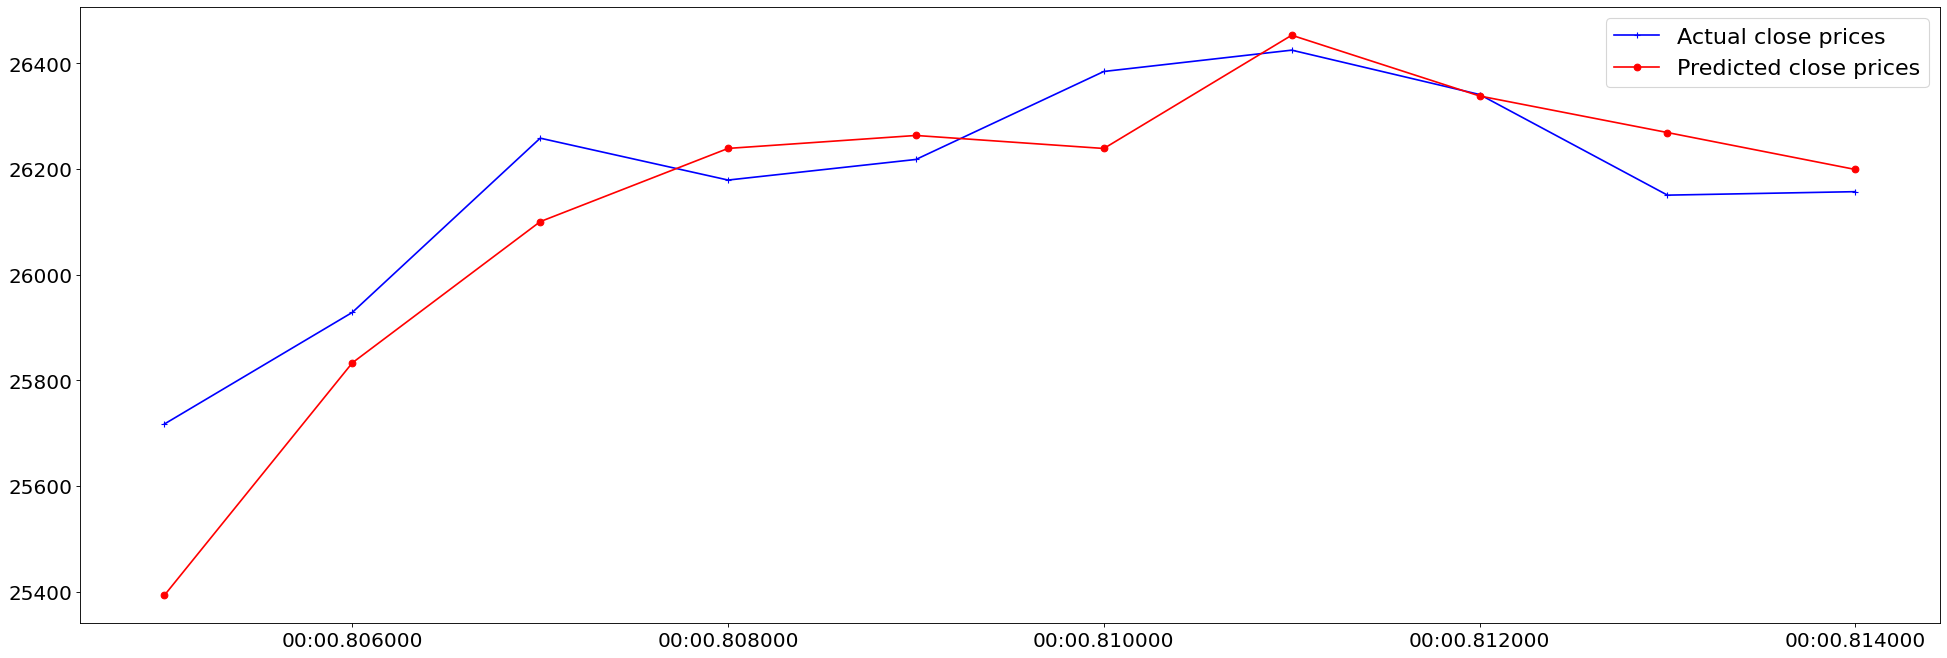

In [70]:
plt.figure(figsize=(30,10), dpi=80)
plt.rcParams.update({'font.size': 18})

x_axis = np.array(test_data.index[0:num_days_to_predict], dtype='datetime64[ms]')
plt.plot(x_axis, test_data.iloc[0:num_days_to_predict]['Close'], 'b+-', label="Actual close prices")
plt.plot(x_axis, predicted_close_prices, 'ro-', label="Predicted close prices")
plt.legend(prop={'size': 20})
plt.show()

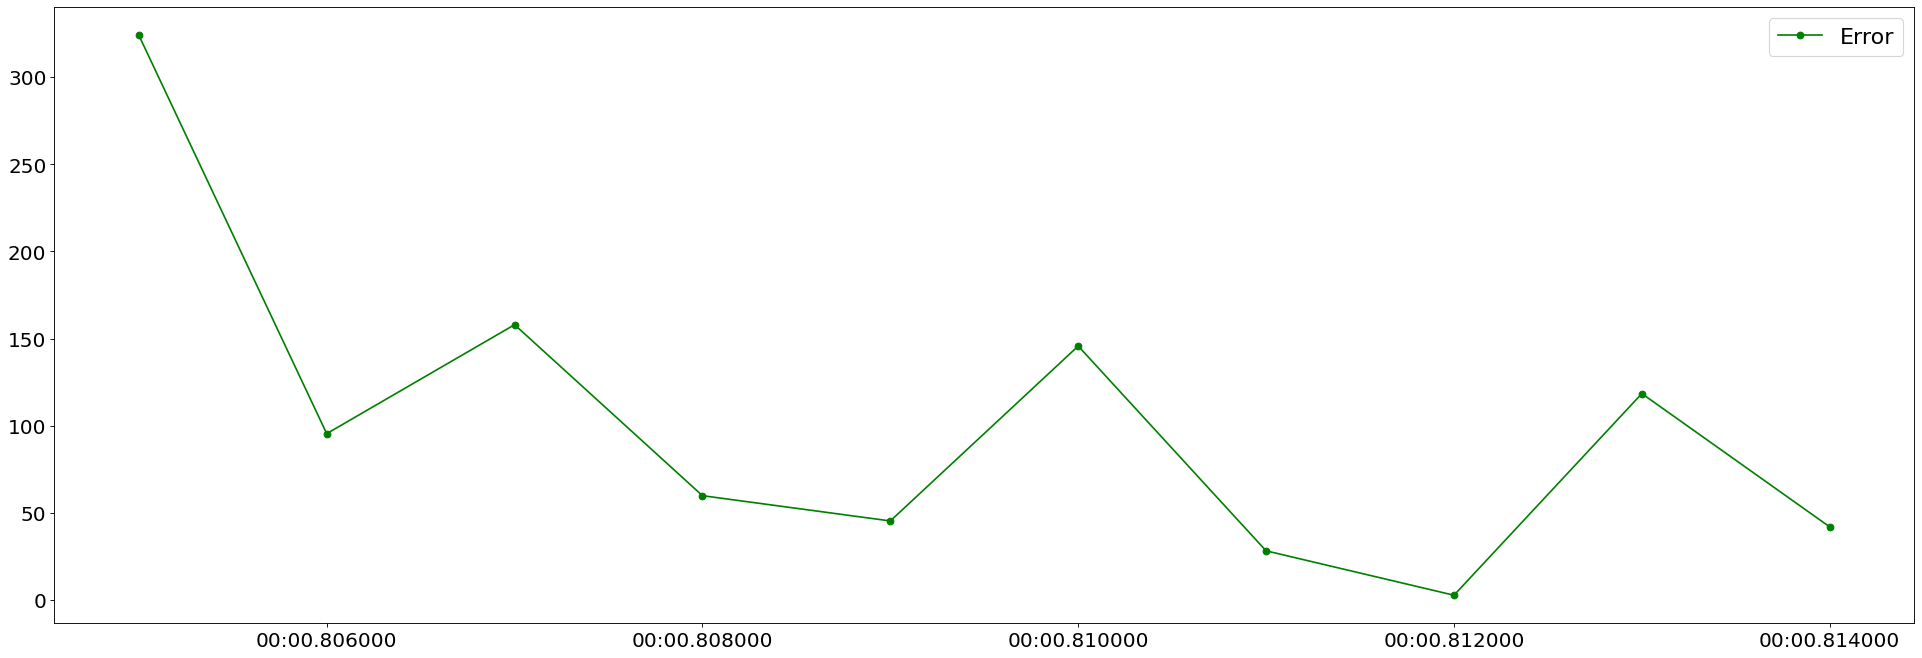

In [71]:
ae = abs(test_data.iloc[0:num_days_to_predict]['Close'] - predicted_close_prices)

plt.figure(figsize=(30,10), dpi=80)

plt.plot(x_axis, ae, 'go-', label="Error")
plt.legend(prop={'size': 20})
plt.show()

In [72]:
print("Max error observed = " + str(ae.max()))
print("Min error observed = " + str(ae.min()))
print("Mean error observed = " + str(ae.mean()))

Max error observed = 324.06300222569917
Min error observed = 2.7822832488709537
Mean error observed = 102.00289778606493


Model is not converging.  Current: 9343.515735299176 is not greater than 9352.77485563067. Delta is -9.259120331495069
100%|██████████| 50/50 [00:12<00:00,  3.90it/s]


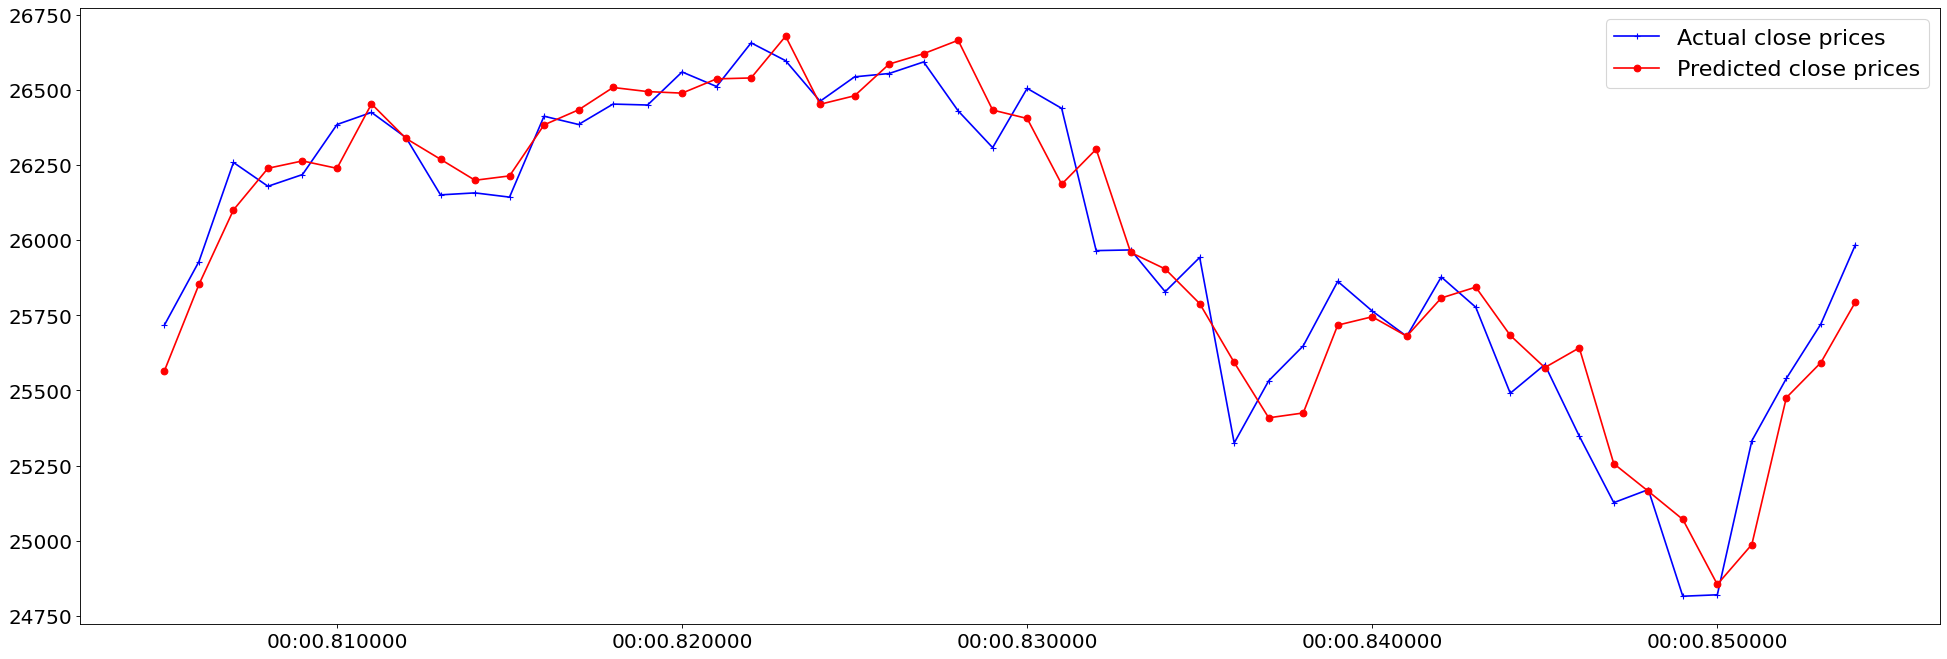

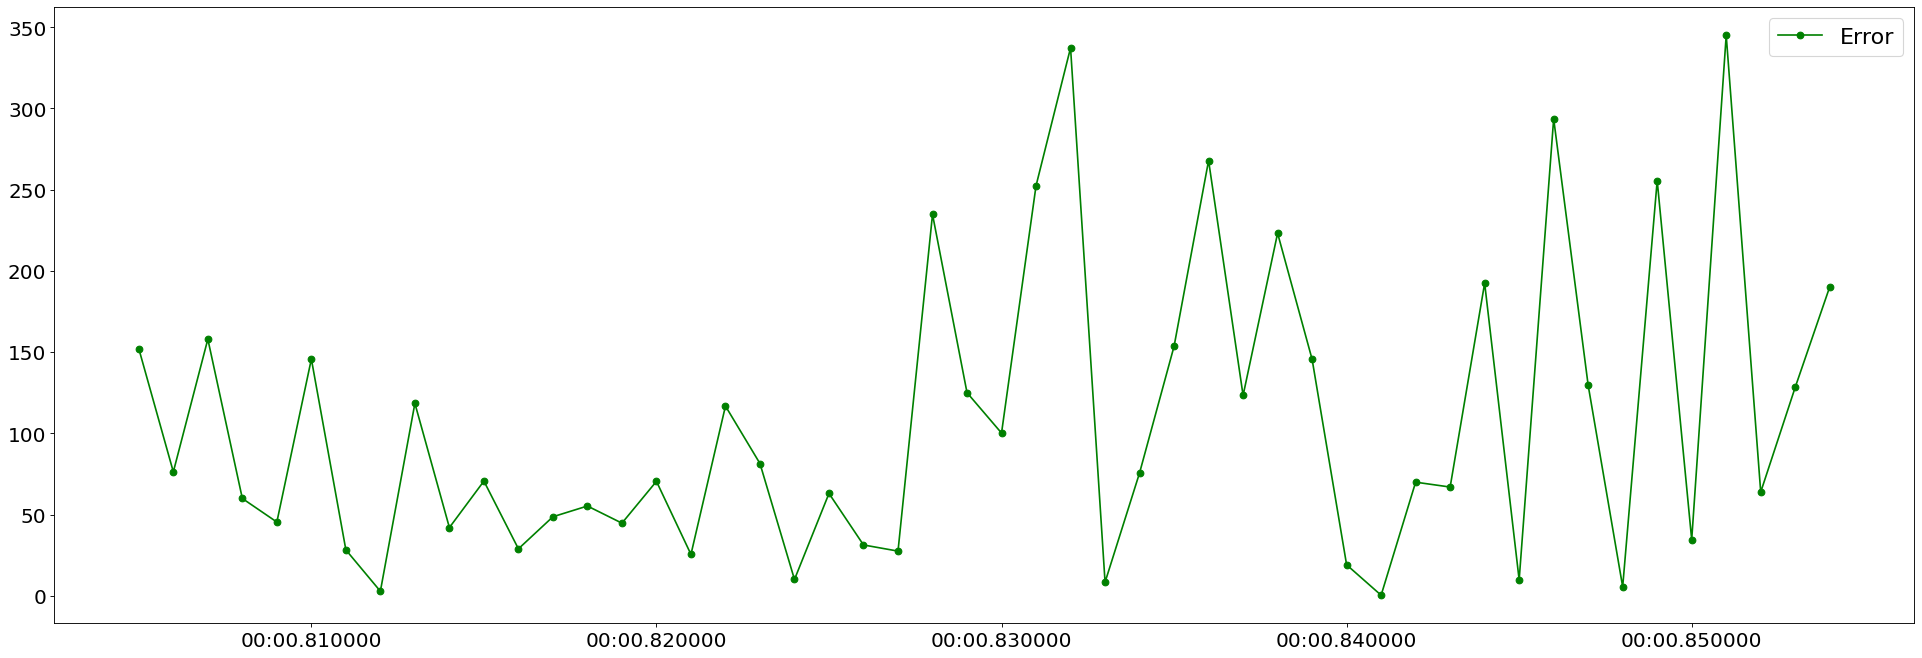

Model is not converging.  Current: 9258.3495823642 is not greater than 9265.294777149156. Delta is -6.9451947849556745


Max error observed = 345.1036624287808
Min error observed = 0.33874302465483197
Mean error observed = 107.1042617897084


100%|██████████| 50/50 [00:13<00:00,  3.73it/s]


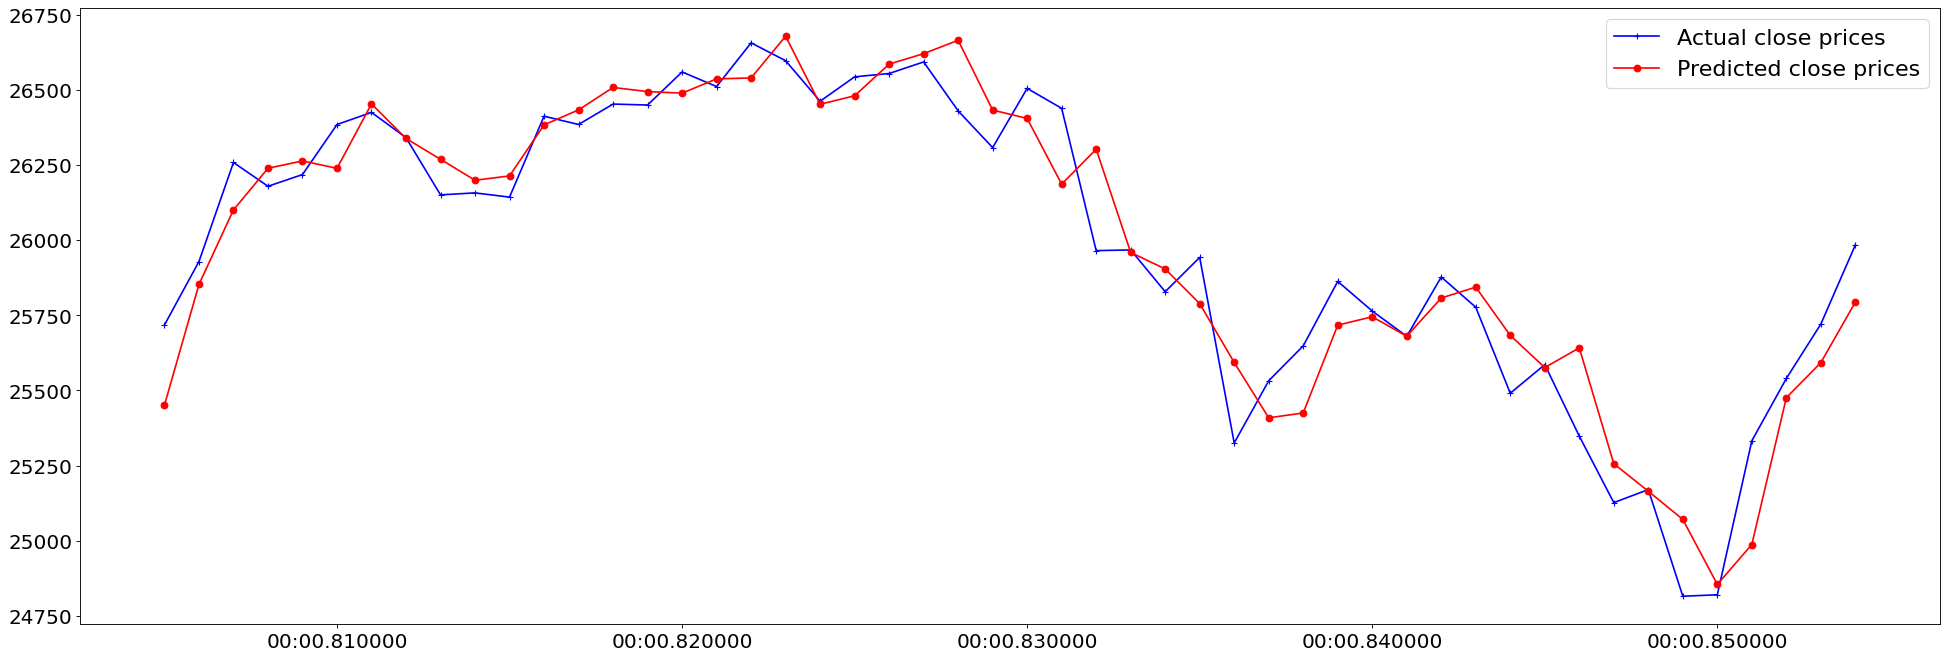

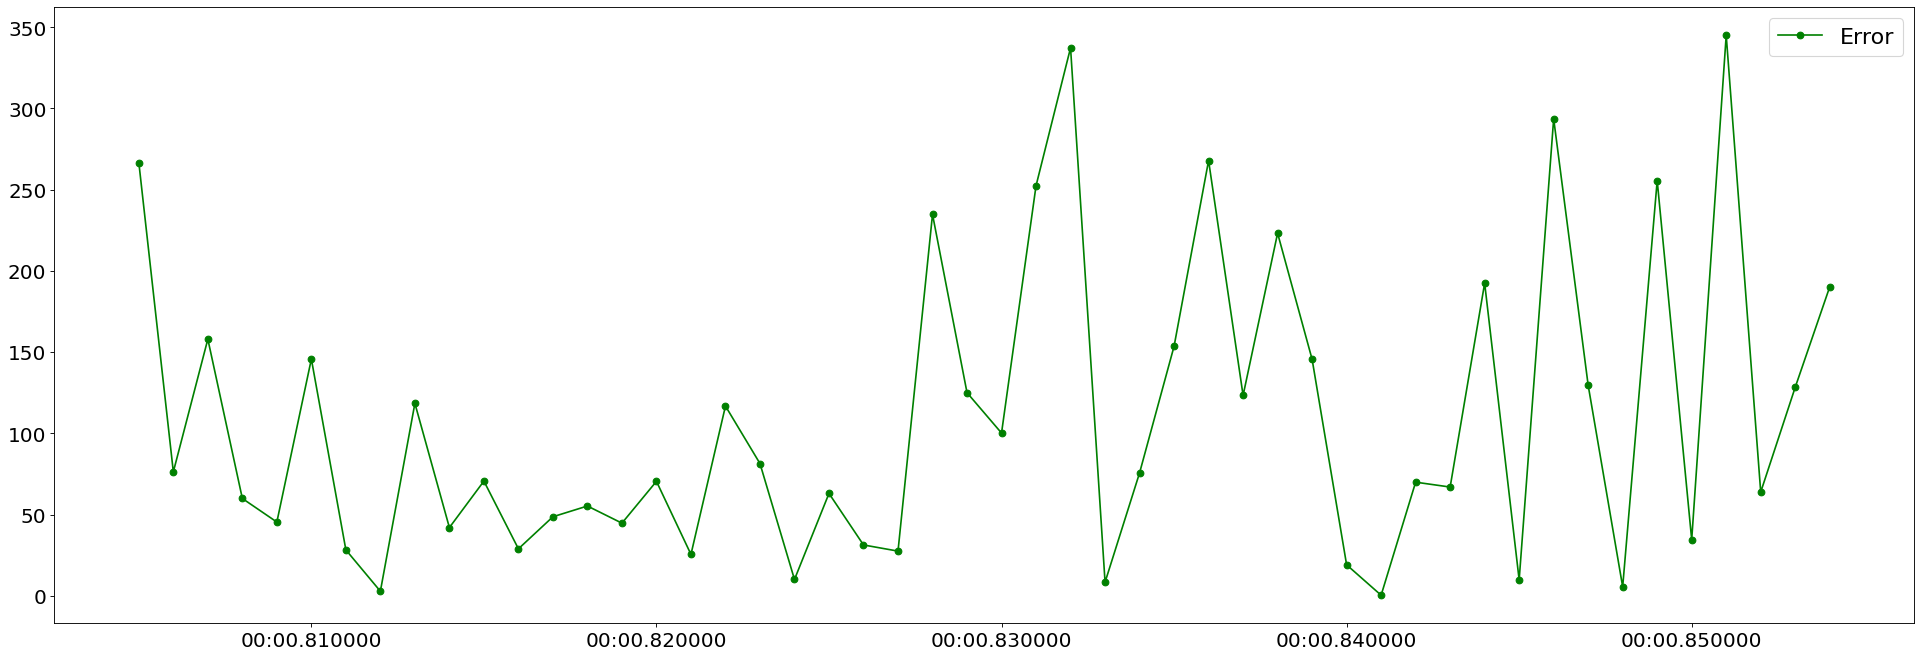

Model is not converging.  Current: 9286.077707198276 is not greater than 9287.440248519431. Delta is -1.3625413211557316


Max error observed = 345.1036624287808
Min error observed = 0.33874302465483197
Mean error observed = 109.3975881238388


100%|██████████| 50/50 [00:14<00:00,  3.40it/s]


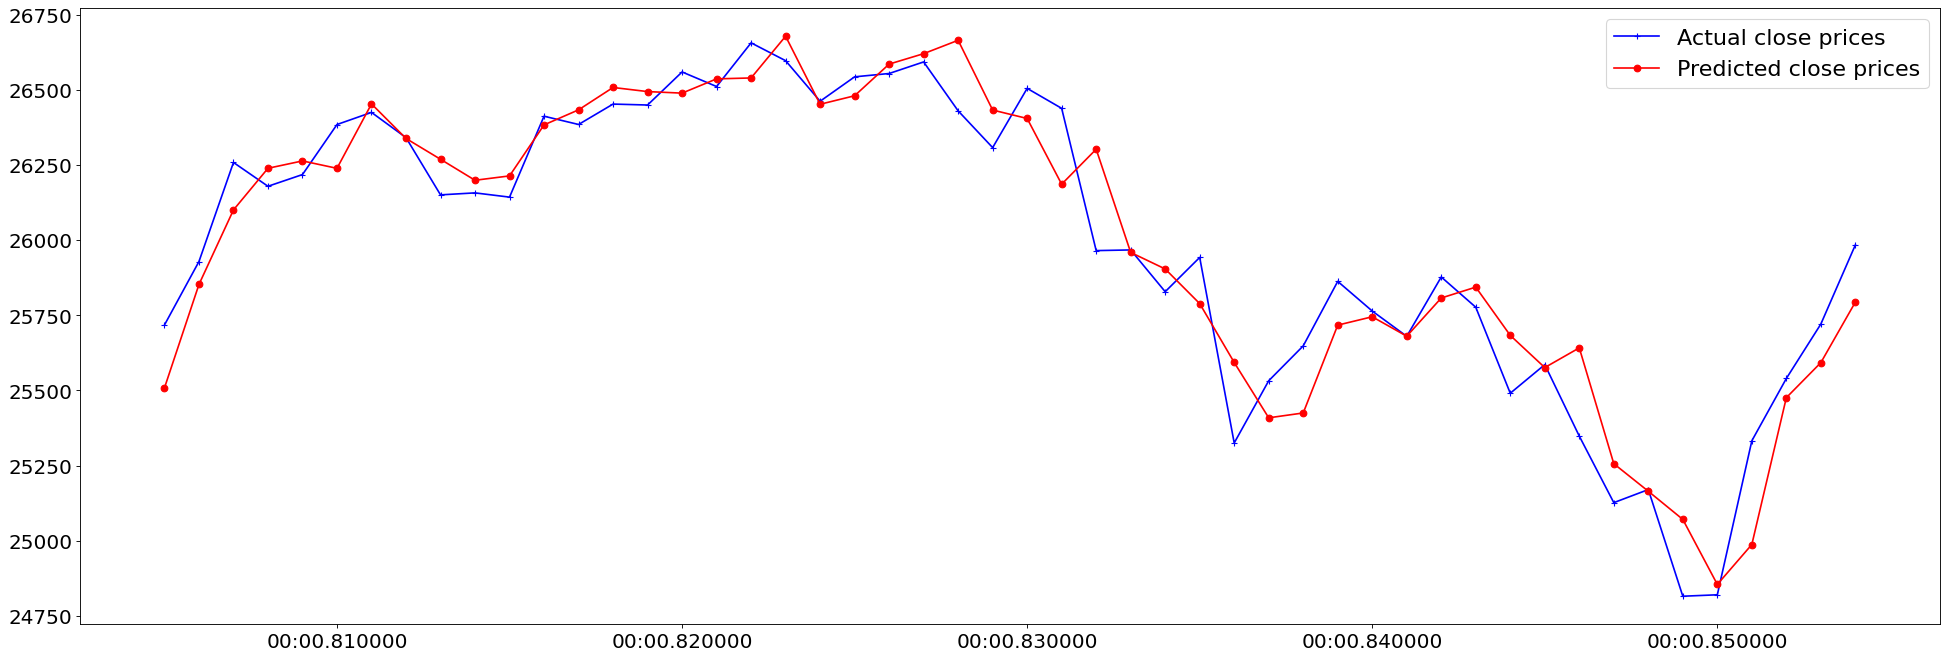

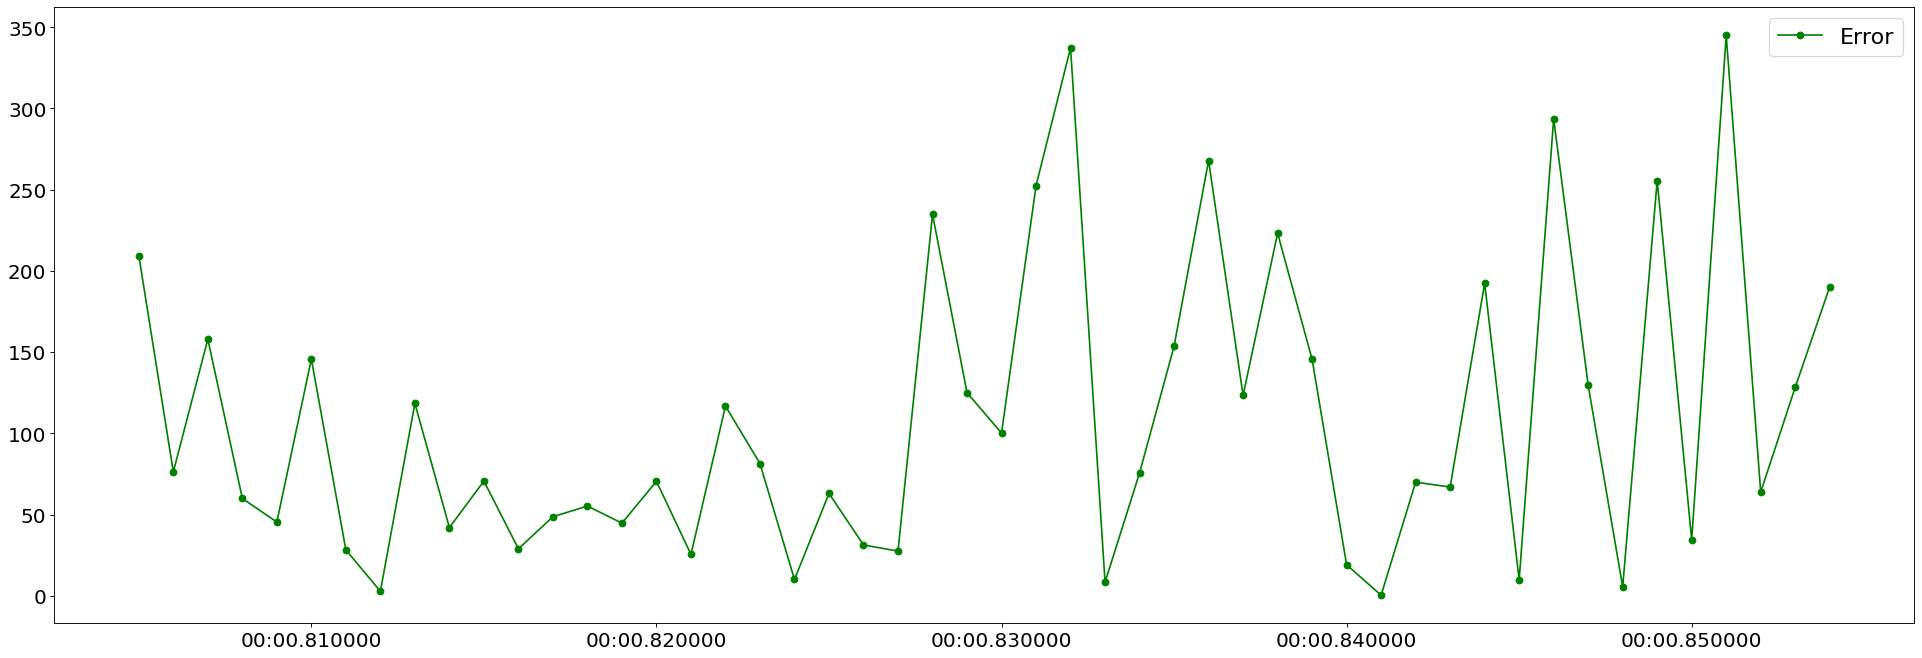

Max error observed = 345.1036624287808
Min error observed = 0.33874302465483197
Mean error observed = 108.2509249567736


In [73]:
num_days_to_predict = 50
for n_comp in [3,7,10]:
    model = GaussianHMM(n_components=n_comp)
    feature_train_data = augment_features(train_data)
    features_train = extract_features(feature_train_data)
    model.fit(features_train)
    test_augmented = augment_features(test_data)
    fracocp = test_augmented['delOpenClose']
    frachp = test_augmented['delHighOpen']
    fraclp = test_augmented['delLowOpen']

    sample_space_fracocp = np.linspace(fracocp.min(), fracocp.max(), 50)
    sample_space_fraclp = np.linspace(fraclp.min(), frachp.max(), 10)
    sample_space_frachp = np.linspace(frachp.min(), frachp.max(), 10)

    possible_outcomes = np.array(list(itertools.product(sample_space_fracocp, sample_space_frachp, sample_space_fraclp)))

    predicted_close_prices = []
    for i in tqdm(range(num_days_to_predict)):
        # Calculate start and end indices
        previous_data_start_index = max(0, i - num_latent_days)
        previous_data_end_index = max(0, i)
        # Acquire test data features for these days
        previous_data = extract_features(augment_features(test_data.iloc[previous_data_start_index:previous_data_end_index]))
        
        outcome_scores = []
        for outcome in possible_outcomes:
            # Append each outcome one by one with replacement to see which sequence generates the highest score
            total_data = np.row_stack((previous_data, outcome))
            outcome_scores.append(model.score(total_data))
            
        # Take the most probable outcome as the one with the highest score
        most_probable_outcome = possible_outcomes[np.argmax(outcome_scores)]
        predicted_close_prices.append(test_data.iloc[i]['Open'] * (1 + most_probable_outcome[0]))

    plt.figure(figsize=(30,10), dpi=80)
    plt.rcParams.update({'font.size': 18})

    x_axis = np.array(test_data.index[0:num_days_to_predict], dtype='datetime64[ms]')
    plt.plot(x_axis, test_data.iloc[0:num_days_to_predict]['Close'], 'b+-', label="Actual close prices")
    plt.plot(x_axis, predicted_close_prices, 'ro-', label="Predicted close prices")
    plt.legend(prop={'size': 20})
    plt.show()
    ae = abs(test_data.iloc[0:num_days_to_predict]['Close'] - predicted_close_prices)

    plt.figure(figsize=(30,10), dpi=80)

    plt.plot(x_axis, ae, 'go-', label="Error")
    plt.legend(prop={'size': 20})
    plt.show()
    print("Max error observed = " + str(ae.max()))
    print("Min error observed = " + str(ae.min()))
    print("Mean error observed = " + str(ae.mean()))

### Сравнение ARMA и HMM

* Если ваши наблюдения/данные, по-видимому (или известно) зависят от предыдущих наблюдений, используйте ARMA.

* Если ваши наблюдения/данные независимы во времени, используйте HMM.
Для рядов HMM предполагается, что каждое состояние имеет стационарные свойства.

* В рядах ARMA это зависит от параметров. С циклическими данными модели ARMA (и ARIMA) обычно лучше.

* Для стационарных данных с одним наблюдаемым событием HMM обычно переобученнее, поэтому моделей ARMA достаточно.

* Для многомерных данных предпочтительнее HMM.

* Модели ARMA предназначены для моделирования событий, зависящих от времени, и для прогнозирования развития явления во времени.

* HMM обычно плохо работают в долгосрочных прогнозах.

* Для сегментации и моделирования временных данных следует использовать HMM.

* И ARMA, и HMM можно использовать для заполнения отсутствующих данных.

* Для анализа последовательностей данных, отличных от временных данных, обычно
предпочтительнее использовать HMM.